In [0]:
# Install Packages and Libraries

import tensorflow as tf
import numpy as np
import datetime
import os

In [0]:
# Import Dataset

import tensorflow_datasets as tfds
datasets,info=tfds.load(name='fashion_mnist', with_info=True, as_supervised=True, split=['train', 'test'], batch_size=-1)

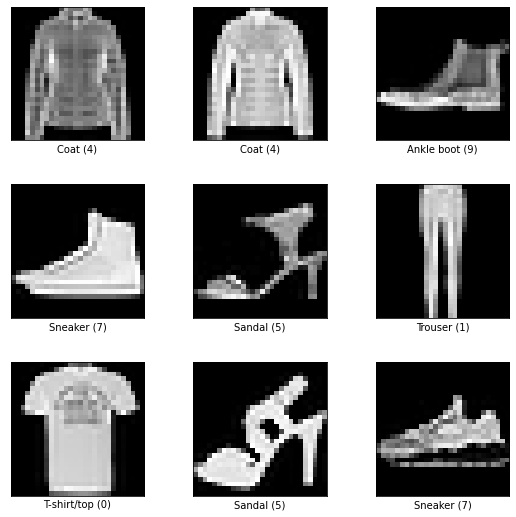

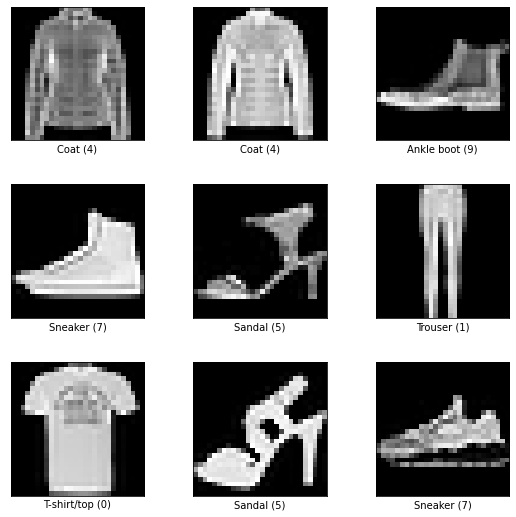

In [3]:
img_train,info_train=tfds.load(name='fashion_mnist',with_info=True,split='test')
tfds.show_examples(info_train,img_train)

In [4]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU')]

In [0]:
train, test = tfds.as_numpy(datasets[0]),tfds.as_numpy(datasets[1])

In [0]:
X_train, y_train=train[0]/255, tf.one_hot(train[1],10)
X_test, y_test=test[0]/255, tf.one_hot(test[1],10)

In [0]:
X_test, X_val=X_test[5000:], X_test[:5000]
y_test, y_val=y_test[5000:], y_test[:5000]

In [15]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_test.shape)
print(y_val.shape)

(60000, 28, 28, 1)
(5000, 28, 28, 1)
(5000, 28, 28, 1)
(5000, 10)
(5000, 10)


In [0]:
def create_model():
  model=tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(32,5,padding='same',activation='relu',input_shape=(28,28,1)))
  model.add(tf.keras.layers.MaxPooling2D())
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Conv2D(64,5,padding='same',activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D())
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Conv2D(128,5,padding='same',activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D())
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Conv2D(256,5,padding='same',activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D())
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(512))
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(10))
  model.add(tf.keras.layers.Activation('softmax'))
  return model


In [17]:
resolver=tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy=tf.distribute.experimental.TPUStrategy(resolver)

with strategy.scope():
  model=create_model()
  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3,),
      loss='categorical_crossentropy',
      metrics=['accuracy'])

  history=model.fit(
     X_train.astype(np.float32),np.float32(y_train),
     batch_size=256,
     epochs=25,
     steps_per_epoch=234,
     validation_data=(X_val.astype(np.float32), np.float32(y_val)),
     validation_freq=1

 )     


INFO:tensorflow:Initializing the TPU system: grpc://10.2.170.114:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.2.170.114:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Epoch 1/25
234/234 [==============================] - 6s 25ms/step - loss: 0.7495 - accuracy: 0.7174 - val_loss: 0.4380 - val_accuracy: 0.8348
Epoch 2/25
234/234 [==============================] - 4s 15ms/step - loss: 0.4183 - accuracy: 0.8469 - val_loss: 0.3469 - val_accuracy: 0.8720
Epoch 3/25
234/234 [==============================] - 4s 15ms/step - loss: 0.3498 - accuracy: 0.8728 - val_loss: 0.3161 - val_accuracy: 0.8876
Epoch 4/25
234/234 [==============================] - 4s 16ms/step - loss: 0.3099 - accuracy: 0.8877 - val_loss: 0.2891 - val_accuracy: 0.8962
Epoch 5/25
234/234 [==============================] - 4s 16ms/step - loss: 0.2877 - accuracy: 0.8940 - val_loss: 0.2804 - val_accuracy: 0.8992
Epoch 6/25
234/234 [==============================] - 4s 15ms/step - loss: 0.2707 - accuracy: 0.8994 - val_loss: 0.2772 - val_accuracy: 0.8992
Epoch 7/25
234/234 [==============================] - 4s 16ms/step - loss: 0.2557 - accuracy: 0.9067 - val_loss: 0.2517 - val_accuracy: 0.9054

In [0]:
model.save('/tmp/fashion_tpu.hdf5')

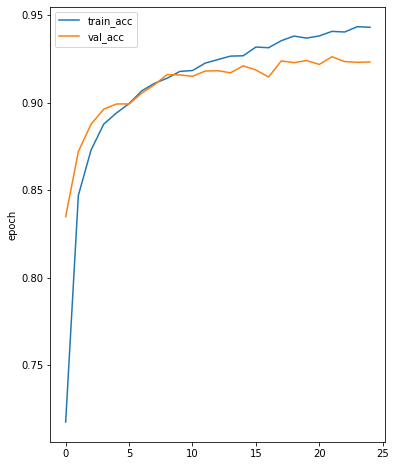

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train_acc','val_acc'])
plt.show()

In [0]:
fminst_load=tf.keras.models.load_model('/tmp/fashion_tpu.hdf5',compile=True)


In [21]:
fminst_load.evaluate(X_test, y_test)

157/157 [==============================] - 2s 11ms/step - loss: 0.2353 - accuracy: 0.9238


[0.23530696332454681, 0.923799991607666]

In [0]:
y_pred=fminst_load.predict(X_test)

In [0]:
from sklearn.metrics import classification_report

In [0]:
labels=info.features["label"].names

In [26]:
y_pred

array([[5.94682290e-13, 1.00000000e+00, 2.17318161e-14, ...,
        1.38323727e-19, 5.67167883e-15, 6.85381580e-21],
       [5.33216059e-01, 7.80945584e-08, 4.15501199e-05, ...,
        2.45637705e-10, 2.35308207e-07, 8.70810993e-11],
       [7.94070840e-01, 2.73595797e-04, 8.29464942e-02, ...,
        3.22936357e-05, 5.94600220e-04, 2.46060627e-05],
       ...,
       [9.55181569e-02, 6.95989281e-03, 1.62356161e-02, ...,
        5.26789634e-04, 3.46486010e-02, 3.92052752e-04],
       [2.17325214e-06, 2.34662316e-08, 1.70643174e-03, ...,
        2.21205099e-08, 1.39632575e-05, 6.69655833e-08],
       [2.19696508e-19, 1.00000000e+00, 6.43204064e-19, ...,
        3.30120983e-25, 7.75579163e-21, 5.00792091e-27]], dtype=float32)

In [27]:
print(classification_report(y_test.numpy().argmax(axis=1),y_pred.argmax(axis=1),target_names=info.features["label"].names))

              precision    recall  f1-score   support

 T-shirt/top       0.91      0.83      0.86       489
     Trouser       0.99      0.98      0.99       513
    Pullover       0.90      0.87      0.88       478
       Dress       0.93      0.92      0.92       510
        Coat       0.85      0.91      0.88       518
      Sandal       0.99      0.99      0.99       494
       Shirt       0.78      0.81      0.79       519
     Sneaker       0.95      0.99      0.97       484
         Bag       0.97      0.99      0.98       496
  Ankle boot       0.99      0.96      0.97       499

    accuracy                           0.92      5000
   macro avg       0.93      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000



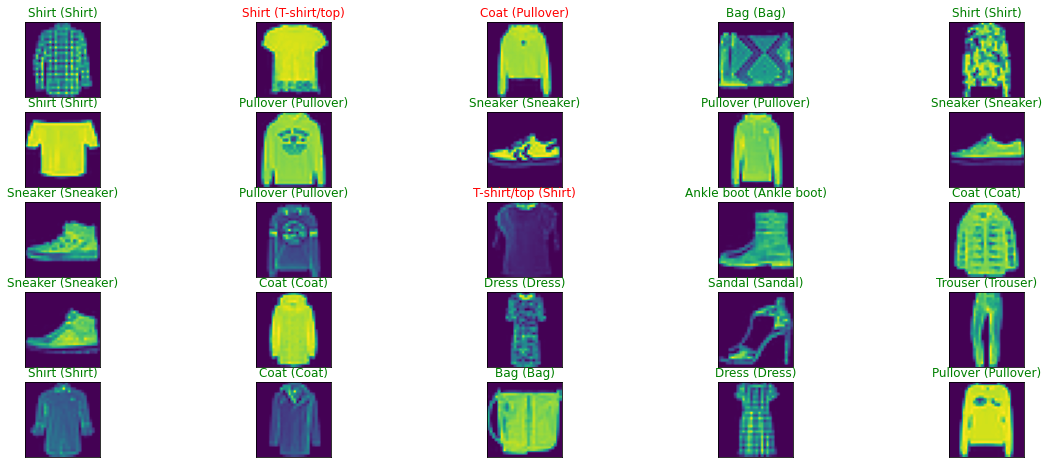

In [32]:
figure=plt.figure(figsize=(20,8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=25, replace=False)):
  ax=figure.add_subplot(5,5,i+1,xticks=[], yticks=[])
  ax.imshow(np.squeeze(X_test[index])) 
  predict_index=np.argmax(y_pred[index])
  true_index=np.argmax(y_test.numpy()[index])
  ax.set_title("{} ({})".format(labels[predict_index],
                                labels[true_index]),
                                color=("green" if predict_index == true_index else "red"))
